In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
eta = np.arange(0,20,0.02)
deta = np.median(np.diff(eta))

In [4]:
g = 0.*eta
f = 0.*eta
h = 0.*eta
h_1=[]
g_N=[]

#Integrate once:
h[0]=0.02
for i in range(1,len(eta)):
    f[i]=f[i-1]+g[i-1]*deta
    g[i]=g[i-1]+h[i-1]*deta
    h[i]=h[i-1]-0.5*f[i-1]*h[i-1]*deta
g1 = g[-1]
h1 = h[0]
g_N+=[g1]
h_1+=[h1]

# integrate a second time
g = 0.*eta
f = 0.*eta
h = 0.*eta
h[0]=2.
print(g1)
for i in range(1,len(eta)):
    f[i]=f[i-1]+g[i-1]*deta
    g[i]=g[i-1]+h[i-1]*deta
    h[i]=h[i-1]-0.5*f[i-1]*h[i-1]*deta
g2 = g[-1] 
h2 = h[0]
g_N+=[g2]
h_1+=[h2]
print (g1, g2)

# now iterate on two solutions using Newton-Raphson 
while (np.abs(g2-1.))>0.001:
    if np.abs(g2-g1)>1e-10:
        h[0]=h[0] - (g1-1.)*(h2-h1)/(g2-g1)
    else: # this shouldn't happen, but if it does, then jump somewhere else and try again...
        h[0]=h[0]+0.1
    if h[0]<0:
        h[0]=0.001
    g1 = g2
    h1 = h2
    g = 0.*eta
    f = 0.*eta
    h[1:]=0.
    for i in range(1,len(eta)):
        f[i]=f[i-1]+g[i-1]*deta
        g[i]=g[i-1]+h[i-1]*deta
        h[i]=h[i-1]-0.5*f[i-1]*h[i-1]*deta
    g2 = g[-1]
    g_N+=[g2]
    h2 = h[0]
    h_1+=[h2]
    #print(g2)
   
print(h2)
print(g2)

0.15407896994302156
0.15407896994302156 3.3531759839783906
0.328484420054851
0.9998205717574503


0.328484420054851
0.9998205717574503


<IPython.core.display.Javascript object>


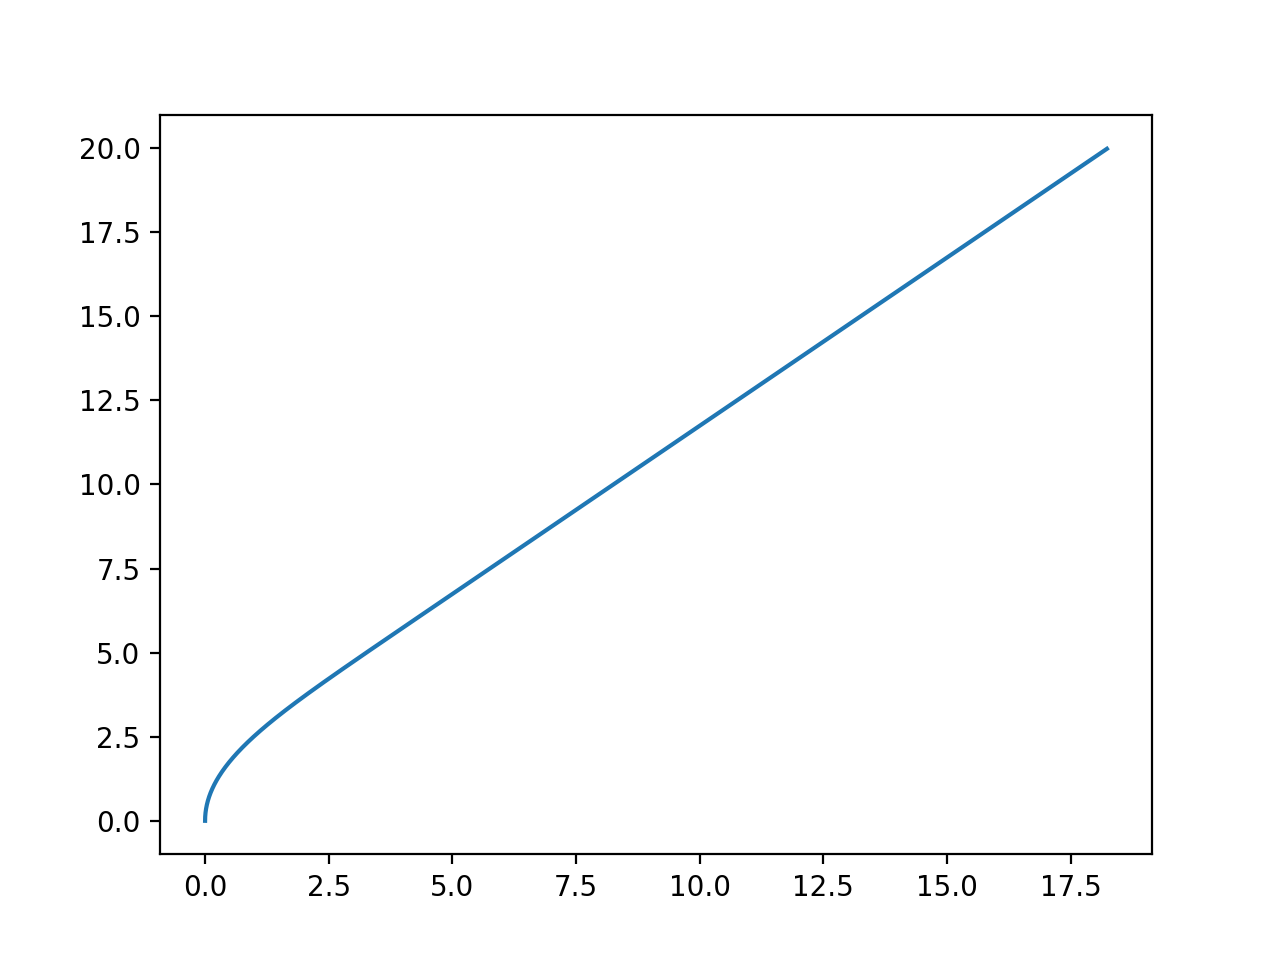

In [6]:
print( h2)
print(g2)
fig,ax=plt.subplots()
ax.plot(f,eta)

<IPython.core.display.Javascript object>


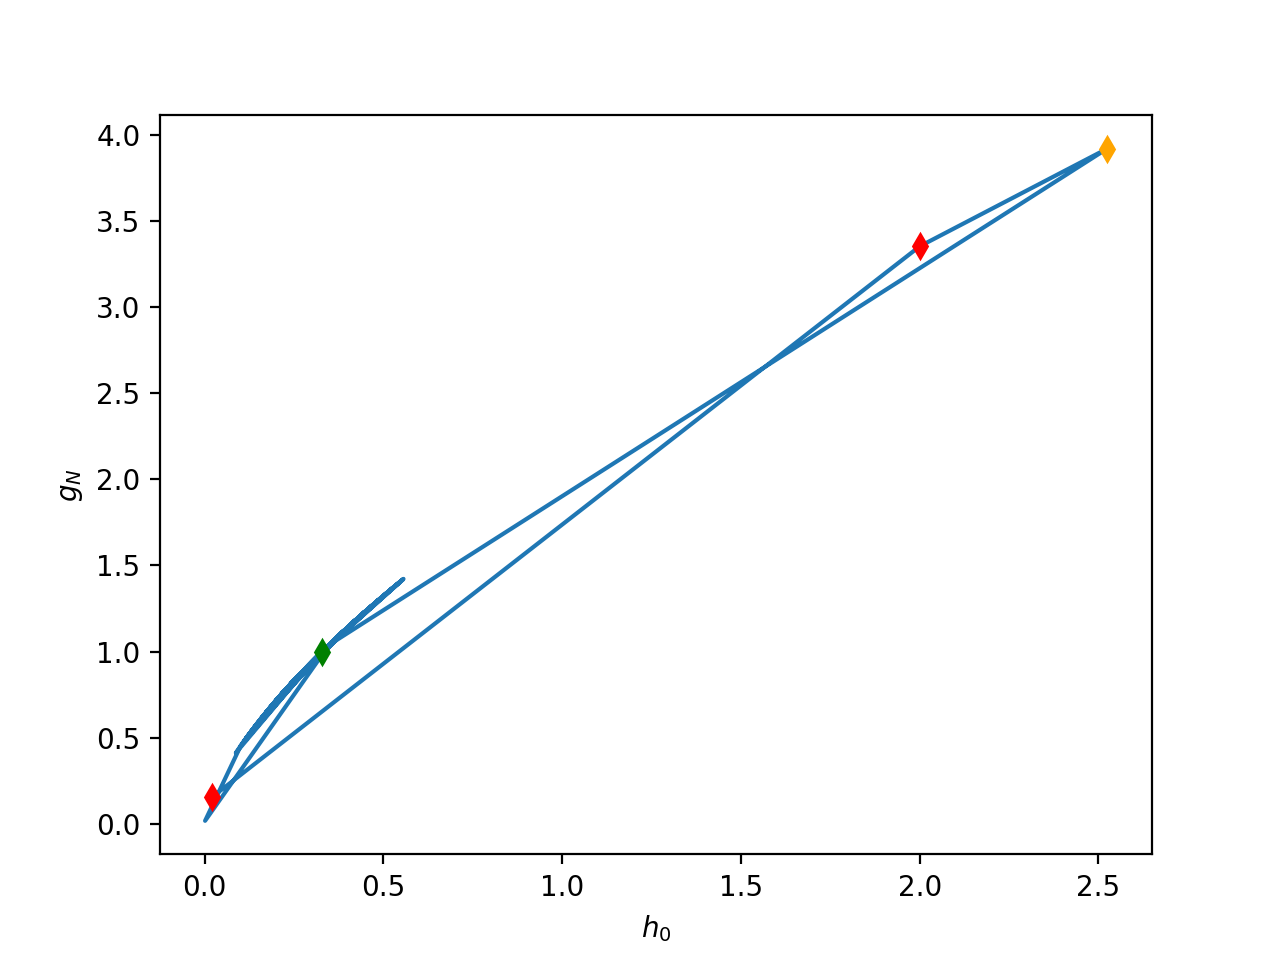

Text(0.5,0,'$h_0$')

In [12]:
fig,ax=plt.subplots()
ax.plot(h_1,g_N)
ax.plot(h_1[-1],g_N[-1],'dg')
ax.plot(h_1[:2],g_N[:2],'rd')
ax.plot(h_1[2],g_N[2],'d', color='orange')
ax.set_ylabel('$g_N$')
ax.set_xlabel('$h_0$')


In [8]:
x = np.arange(0.2,20.,0.2)
z = np.arange(0.2,10.,0.03)
etaE = np.hstack((eta,1000.))
fE = np.hstack((f,1000.))
fE[-1] = fE[-2] + (etaE[-1]-etaE[-2])*(fE[-2]-fE[-3])/(etaE[-2]-etaE[-3])
print(etaE[-1])
X,Z = np.meshgrid(x,z)
nu = 0.022
U = 1.
Delta = np.sqrt(nu*X/U)
etag = Z/Delta
psi = np.interp(etag,etaE,fE)*U*Delta
print(Delta)

1000.0
[[0.0663325  0.09380832 0.11489125 ... 0.65329932 0.65665821 0.66      ]
 [0.0663325  0.09380832 0.11489125 ... 0.65329932 0.65665821 0.66      ]
 [0.0663325  0.09380832 0.11489125 ... 0.65329932 0.65665821 0.66      ]
 ...
 [0.0663325  0.09380832 0.11489125 ... 0.65329932 0.65665821 0.66      ]
 [0.0663325  0.09380832 0.11489125 ... 0.65329932 0.65665821 0.66      ]
 [0.0663325  0.09380832 0.11489125 ... 0.65329932 0.65665821 0.66      ]]


<IPython.core.display.Javascript object>


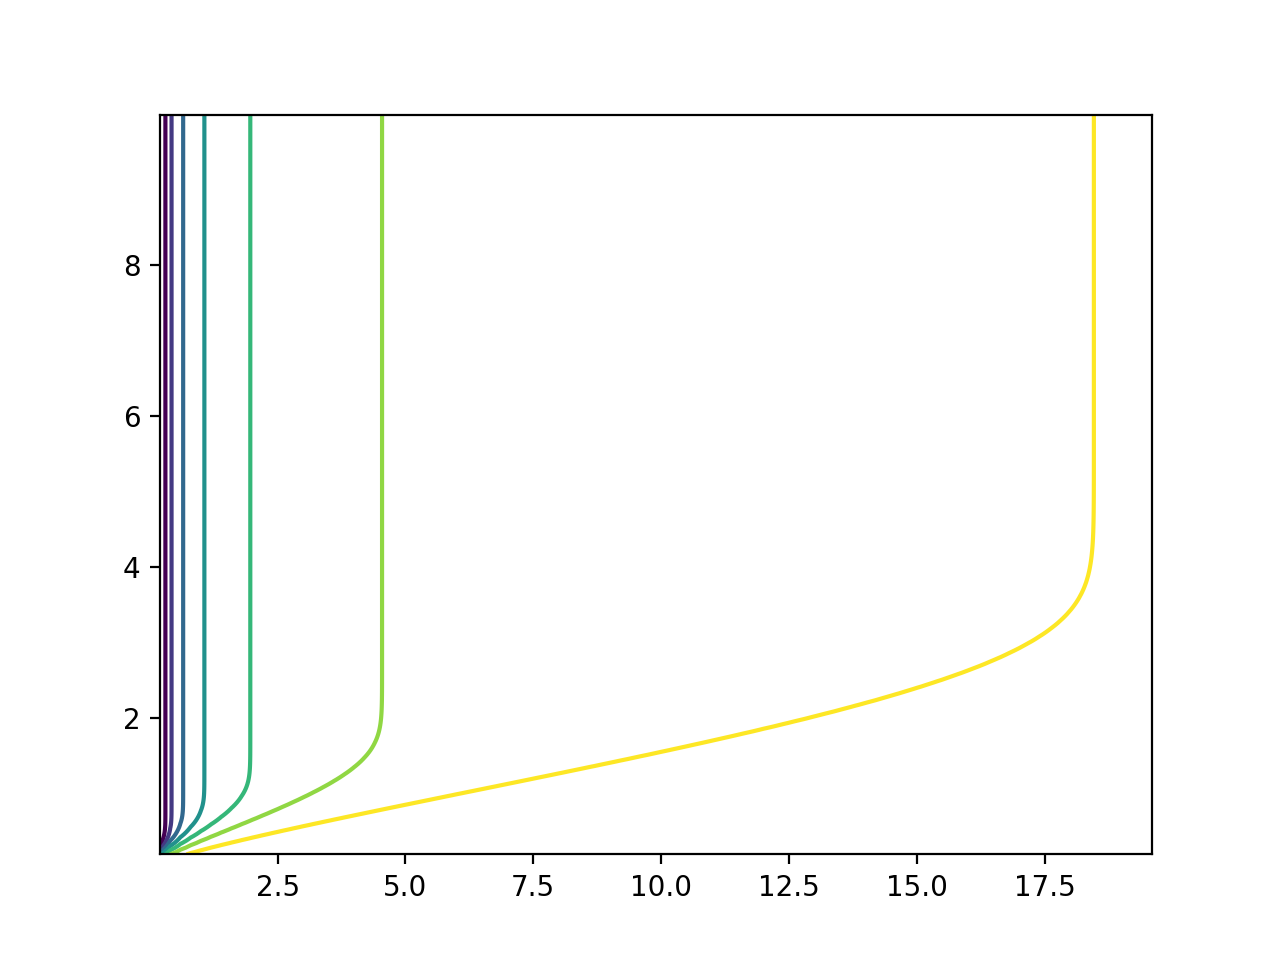

In [9]:
fig,ax = plt.subplots()
ax.contour(x[:-1],z,np.diff(psi,axis=1))